In [1]:
import matplotlib.pyplot as plt
import polars as pl

In [2]:
train_bf16 = pl.read_csv('run-gpt2-bf16-tag-lm loss.csv')
valid_bf16 = pl.read_csv('run-gpt2-bf16-tag-lm loss validation.csv')
train_fp8 = pl.read_csv('run-gpt2-fp8-tag-lm loss.csv')
valid_fp8 = pl.read_csv('run-gpt2-fp8-tag-lm loss validation.csv')

In [3]:
valid_bf16 = valid_bf16.with_columns(
    ((pl.col('Wall time') - train_bf16[0, 'Wall time'])) / 3600
)
train_bf16 = train_bf16.with_columns(
    ((pl.col('Wall time') - train_bf16[0, 'Wall time'])) / 3600
)

valid_fp8 = valid_fp8.with_columns(
    ((pl.col('Wall time') - train_fp8[0, 'Wall time'])) / 3600
)
train_fp8 = train_fp8.with_columns(
    ((pl.col('Wall time') - train_fp8[0, 'Wall time'])) / 3600
)

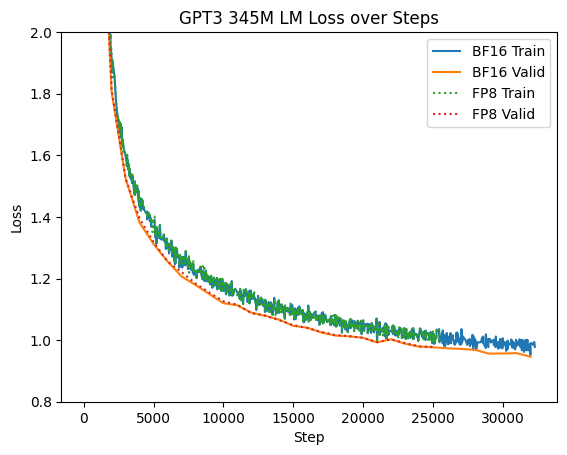

In [4]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_title('GPT3 345M LM Loss over Steps')
ax.set_xlabel('Step')
ax.set_ylabel('Loss')
ax.plot(train_bf16['Step'].to_numpy(), train_bf16['Value'].to_numpy())
ax.plot(valid_bf16['Step'].to_numpy(), valid_bf16['Value'].to_numpy())
ax.plot(train_fp8['Step'].to_numpy(), train_fp8['Value'].to_numpy(), linestyle=':',)
ax.plot(valid_fp8['Step'].to_numpy(), valid_fp8['Value'].to_numpy(), linestyle=':',)
ax.legend(['BF16 Train', 'BF16 Valid', 'FP8 Train', 'FP8 Valid'])
ax.set_ylim(0.8, 2)
plt.show()

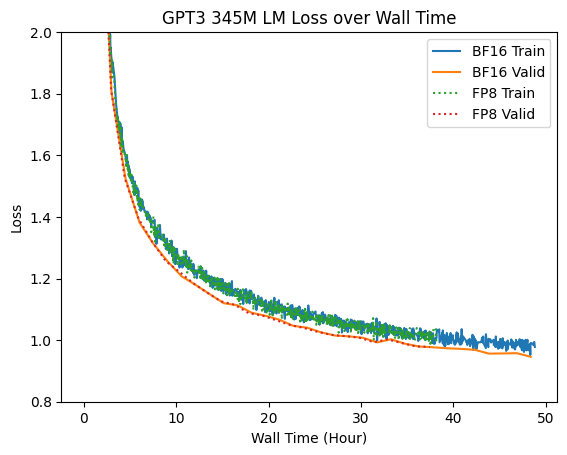

In [5]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_title('GPT3 345M LM Loss over Wall Time')
ax.set_xlabel('Wall Time (Hour)')
ax.set_ylabel('Loss')
ax.plot(train_bf16['Wall time'].to_numpy(), train_bf16['Value'].to_numpy())
ax.plot(valid_bf16['Wall time'].to_numpy(), valid_bf16['Value'].to_numpy())
ax.plot(train_fp8['Wall time'].to_numpy(), train_fp8['Value'].to_numpy(), linestyle=':',)
ax.plot(valid_fp8['Wall time'].to_numpy(), valid_fp8['Value'].to_numpy(), linestyle=':',)
ax.legend(['BF16 Train', 'BF16 Valid', 'FP8 Train', 'FP8 Valid'])
ax.set_ylim(0.8, 2)
plt.show()